In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, signal

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.layers import Input
from tensorflow.keras import models,Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import datasets
import time

%matplotlib inline

In [2]:
(x_train, _), (x_test, _) = datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [3]:
#x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
#x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#OR

x_train = np.expand_dims(x_train, 4)  #expand the last dimension
x_test = np.expand_dims(x_test,4 ) 

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys


In [4]:
x_train.shape

(60000, 28, 28, 1)

##### Model

In [5]:
input_img = Input(shape=(28, 28, 1),name='Input_layer_1')  

encoder1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
encoder2 = MaxPooling2D((2, 2), padding='same')(encoder1)
encoder3 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder2)
encoder4 = MaxPooling2D((2, 2), padding='same')(encoder3)
encoder5 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder4)


encoded = MaxPooling2D((2, 2), padding='same',name='Compressed_layer_7')(encoder5)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

decoder1 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
decoder2 = UpSampling2D((2, 2))(decoder1)
decoder3 = Conv2D(8, (3, 3), activation='relu', padding='same')(decoder2)
decoder4 = UpSampling2D((2, 2))(decoder3)
decoder5 = Conv2D(16, (3, 3), activation='relu')(decoder4)
decoder6 = UpSampling2D((2, 2))(decoder5)
                  
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='Decoding_layer_14')(decoder6)


W0908 00:51:30.750505  4600 deprecation.py:506] From C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
Conv_autoencoder = Model(input_img, decoded)

Conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

W0908 00:51:31.051333  4600 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


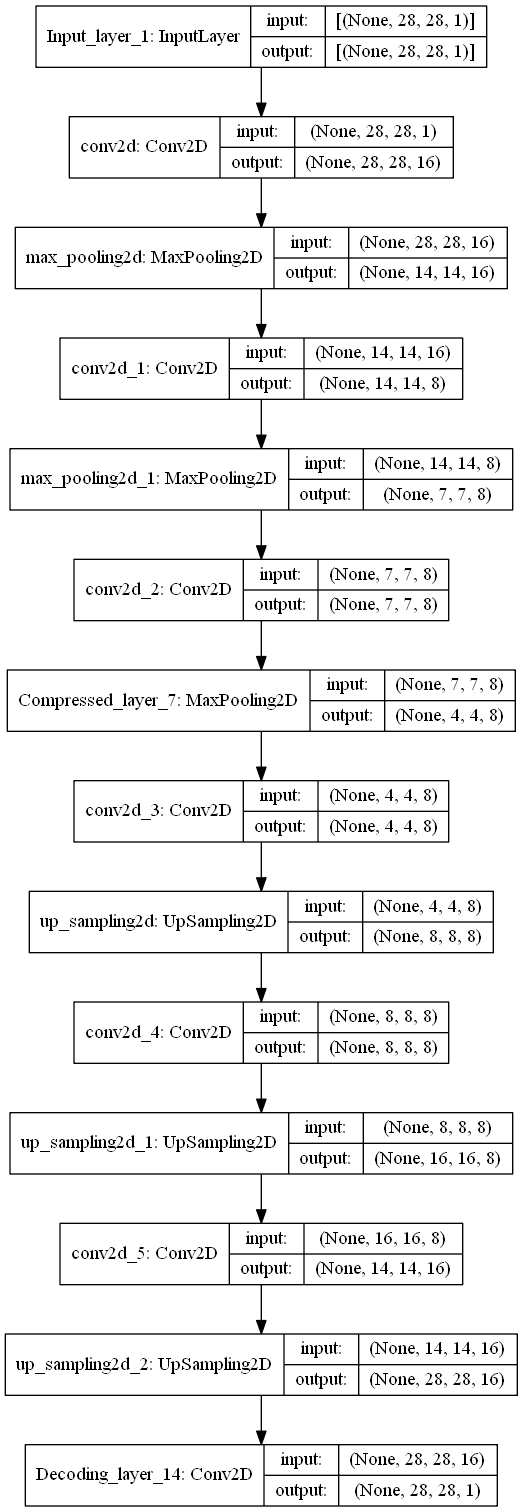

In [7]:
plot_model(Conv_autoencoder, to_file='Conv_ae.png', show_shapes=True)

In [8]:
Conv_autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer_1 (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
Compressed_layer_7 (MaxPooli (None, 4, 4, 8)           0     

In [9]:
Name = 'Conv_autoencoder-{}'.format(int(time.time()))

In [10]:
history=Conv_autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='my_logs\{}'.format(Name))])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 16s 268us/sample - loss: 0.2226 - val_loss: 0.1472
Epoch 2/30
60000/60000 [==============================] - 12s 203us/sample - loss: 0.1379 - val_loss: 0.1306
Epoch 3/30
60000/60000 [==============================] - 12s 205us/sample - loss: 0.1266 - val_loss: 0.1218
Epoch 4/30
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1202 - val_loss: 0.1172
Epoch 5/30
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1158 - val_loss: 0.1126
Epoch 6/30
60000/60000 [==============================] - 12s 203us/sample - loss: 0.1126 - val_loss: 0.1100
Epoch 7/30
60000/60000 [==============================] - 12s 203us/sample - loss: 0.1102 - val_loss: 0.1083
Epoch 8/30
60000/60000 [==============================] - 12s 203us/sample - loss: 0.1083 - val_loss: 0.1063
Epoch 9/30
60000/60000 [==============================] - 12s 206us/sample - l

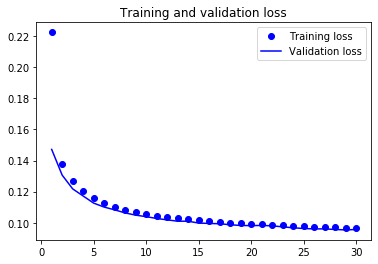

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
Conv_encoder_latent = Model(inputs = input_img, outputs = encoded)

Conv_encoded_imgs = Conv_encoder_latent.predict(x_test)#compressed

Conv_decoded_imgs = Conv_autoencoder.predict(x_test)#reconstructed

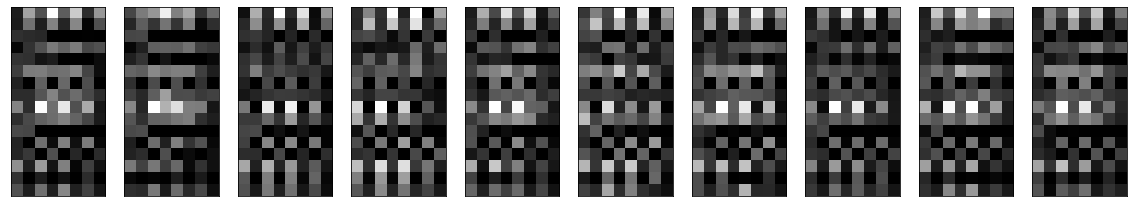

In [13]:
num_images = 10

random_test_image_ind = np.random.randint(x_test.shape[0], size=num_images)

plt.figure(figsize=(20, 8))
for i,image_index in enumerate(random_test_image_ind):
    ax = plt.subplot(1, num_images, i+1)
    plt.imshow(Conv_encoded_imgs[image_index].reshape(8,4*4).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

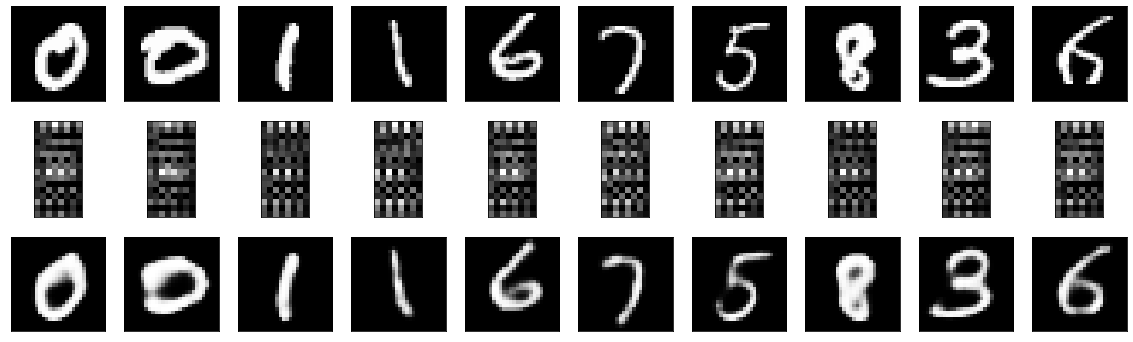

In [14]:
plt.figure(figsize=(20, 6))

for i,image_index in enumerate(random_test_image_ind):
    # display original
    ax = plt.subplot(3, num_images, i+1)
    plt.imshow(x_test[image_index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # compressed representation
    ax = plt.subplot(3, num_images, i+num_images+1)
    plt.imshow(Conv_encoded_imgs[image_index].reshape(8,4*4).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, num_images, i+2*num_images+1)
    plt.imshow(Conv_decoded_imgs[image_index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()


In [15]:
#  free memory resources, it will interrupt the kernel
# os.kill(os.getpid(), signal.SIGTERM)